# Analise de Temperaturas Globais

Neste projeto, exploraremos as mudanças nas temperaturas globais ao longo do tempo. Utilizaremos dados históricos para identificar tendências de aquecimento e padrões sazonais. O objetivo é ganhar insights sobre as mudanças climáticas e como elas afetam diferentes regiões do mundo.

In [5]:
# Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np  

Os dados utilizados nesta análise são provenientes do dataset `GlobalLandTemperaturesByCity.csv`, que contém registros de temperaturas de diversas cidades ao redor do mundo ao longo do tempo.

In [6]:
df_city = pd.read_csv('/home/gabriel/Downloads/archive(1)/GlobalLandTemperaturesByCity.csv')
df_city['dt'] = pd.to_datetime(df_city['dt'])


## Limpeza de Dados

A limpeza dos dados é crucial para uma análise eficaz. Nesta etapa, focaremos na remoção de duplicatas e no tratamento de valores ausentes.


In [7]:
# Limpeza de Dados
df_city.drop_duplicates(inplace=True)
df_city.dropna(subset=['AverageTemperature'], inplace=True)


## Análise Exploratória de Dados (EDA)

A EDA nos ajudará a entender a distribuição e a natureza dos dados que estamos lidando. Visualizaremos a distribuição das temperaturas médias e as mudanças ao longo do tempo.


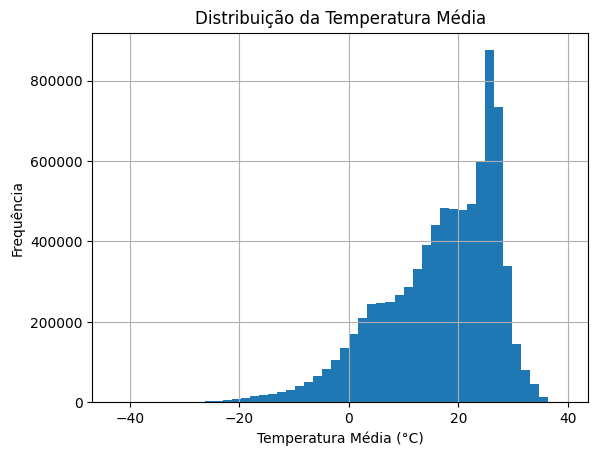

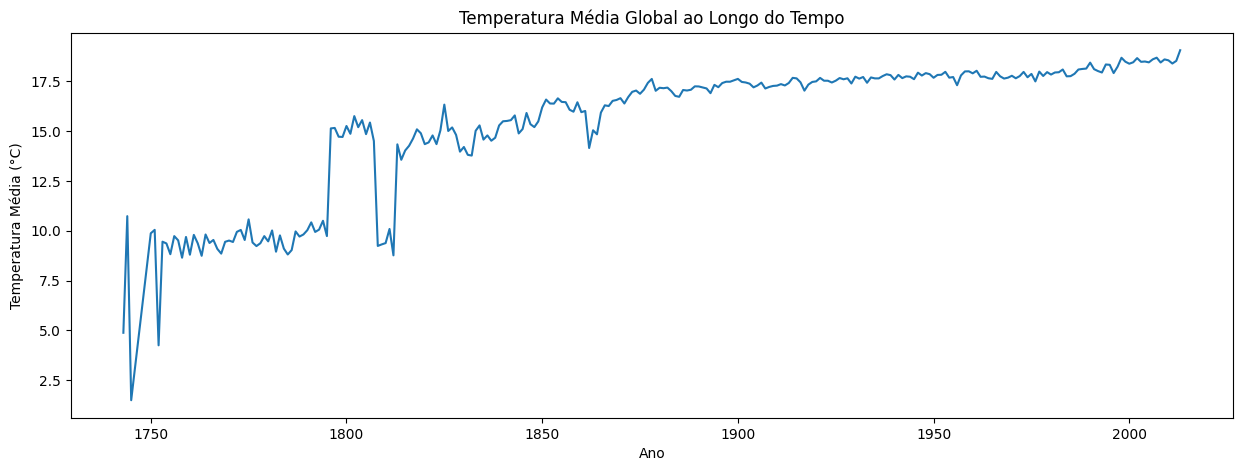

In [8]:
# Histograma da Temperatura Média
df_city['AverageTemperature'].hist(bins=50)
plt.title('Distribuição da Temperatura Média')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.show()

# Gráfico de Linha da Temperatura Média Global ao Longo do Tempo
plt.figure(figsize=(15, 5))
plt.plot(df_city.groupby(df_city['dt'].dt.year)['AverageTemperature'].mean())
plt.title('Temperatura Média Global ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.show()


## Conclusão Parcial e Interpretação dos Gráficos

A partir dos gráficos gerados, podemos tirar algumas conclusões preliminares sobre as temperaturas globais e como elas se distribuem:

### Histograma da Temperatura Média
O histograma nos mostra a frequência de observações para diferentes intervalos de temperatura. A forma do gráfico sugere uma distribuição aproximadamente normal, indicando que a maioria das temperaturas registradas se agrupa em torno de uma média comum, com menos ocorrências em temperaturas extremamente altas ou baixas. A maior concentração de temperaturas em torno do pico do histograma sugere uma temperatura média global que é mais comum em nosso conjunto de dados.

### Gráfico de Linha da Temperatura Média Global ao Longo do Tempo
Este gráfico exibe uma tendência clara de aumento nas temperaturas médias ao longo dos anos. A linha ascendente indica um possível aquecimento global, com temperaturas médias mais altas nos anos mais recentes em comparação com o passado. Isso reforça a discussão sobre mudanças climáticas e a necessidade de entender melhor as suas causas e impactos.

Ambos os gráficos são fundamentais para visualizar e compreender as características dos dados de temperatura que estamos analisando. Eles servem como ponto de partida para análises mais profundas e detalhadas.

## Próxima Etapa: Análise Sazonal
Agora, vamos investigar os padrões sazonais. A análise sazonal pode revelar como as temperaturas variam durante diferentes meses do ano, o que é crucial para entender os padrões climáticos locais e globais. Observaremos as tendências mensais para ver como as temperaturas flutuam de acordo com as estações e se essas flutuações mudaram ao longo do tempo.


In [17]:
# Classificar hemisfério baseado na Latitude
def classify_hemisphere(lat):
    if 'N' in lat:
        return 'Northern'
    elif 'S' in lat:
        return 'Southern'
    else:
        return 'Unknown'

df_city['Hemisphere'] = df_city['Latitude'].apply(classify_hemisphere)

# Separar os dados por hemisfério
northern_df = df_city[df_city['Hemisphere'] == 'Northern']
southern_df = df_city[df_city['Hemisphere'] == 'Southern']


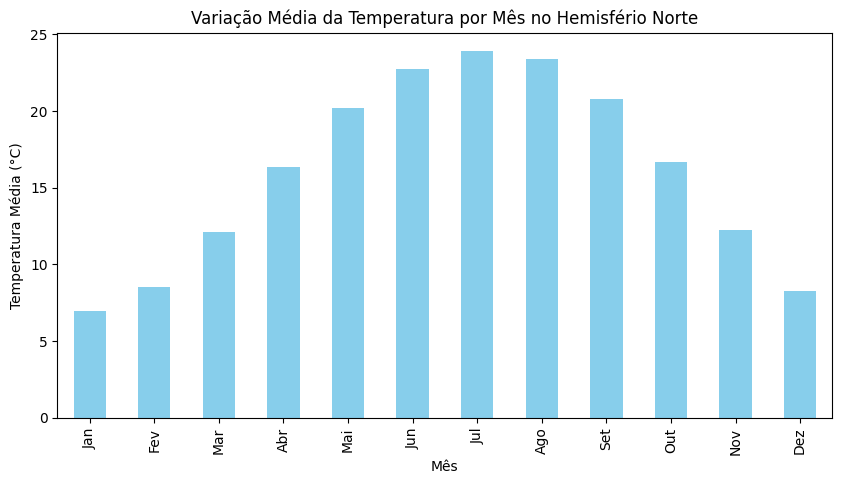

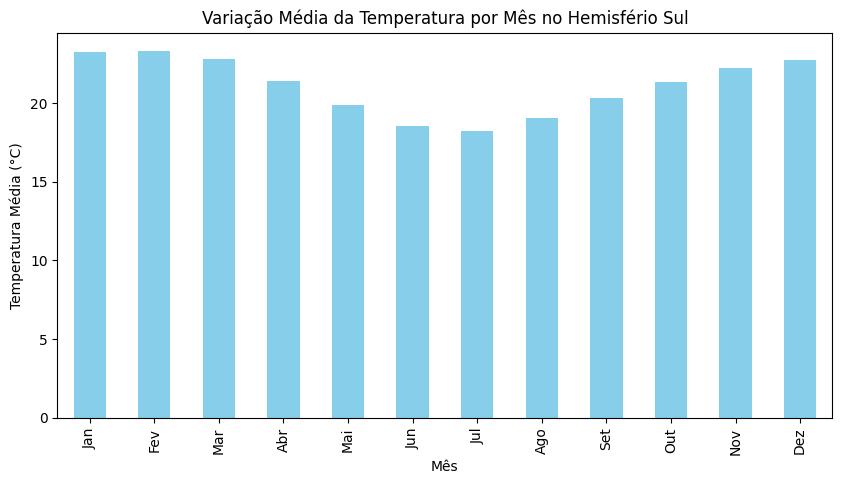

In [10]:
# Função para calcular a média da temperatura mensal por hemisfério
def monthly_avg_by_hemisphere(df, hemisphere_name):
    monthly_avg = df.groupby(df['dt'].dt.month)['AverageTemperature'].mean()
    plt.figure(figsize=(10, 5))
    monthly_avg.plot(kind='bar', color='skyblue')
    plt.title(f'Variação Média da Temperatura por Mês no Hemisfério {hemisphere_name}')
    plt.xlabel('Mês')
    plt.ylabel('Temperatura Média (°C)')
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.show()

# Aplicar a função para cada hemisfério
monthly_avg_by_hemisphere(northern_df, 'Norte')
monthly_avg_by_hemisphere(southern_df, 'Sul')


In [16]:
# Calculando a média de temperatura por ano
yearly_temps = df_city.groupby(df_city['dt'].dt.year)['AverageTemperature'].mean()

# Calculando a média histórica de temperatura
historical_avg_temp = yearly_temps.mean()
yearly_temps_2 = yearly_temps.loc[yearly_temps['dt'].dt.year>1900]
historical_avg_temp2 = yearly_temps_2.mean()

# Plotando as médias anuais e a média histórica
plt.figure(figsize=(15, 5))
yearly_temps.plot(label='Média Anual')
plt.axhline(historical_avg_temp2, color='red', linestyle='--', label='Média Histórica')
plt.title('Médias Anuais de Temperatura e Média Histórica')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 'dt'

In [ ]:
# Calculando a média de temperatura por ano
yearly_temps = df_city.groupby(df_city['dt'].dt.year)['AverageTemperature'].mean()

# Calculando a média histórica de temperatura
historical_avg_temp = yearly_temps.mean()

# Plotando as médias anuais e a média histórica
plt.figure(figsize=(15, 5))
yearly_temps.plot(label='Média Anual - 1900 ate 2000')
plt.axhline(historical_avg_temp, color='red', linestyle='--', label='Média Histórica')
plt.title('Médias Anuais de Temperatura e Média Histórica')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
df_city['dt'] = pd.to_datetime(df_city['dt'])

# Find the hottest record for each city
hottest_records = df_city.loc[df_city.groupby(['City', 'Country'])['AverageTemperature'].idxmax()]

# Find the coldest record for each city
coldest_records = df_city.loc[df_city.groupby(['City', 'Country'])['AverageTemperature'].idxmin()]

# Merge the hottest and coldest records into one DataFrame for comparison
extreme_temps = pd.merge(hottest_records, coldest_records, on=['City', 'Country'], suffixes=('_hottest', '_coldest'))

# Select relevant columns to display
extreme_temps = extreme_temps[['City', 'Country', 'dt_hottest', 'AverageTemperature_hottest', 'dt_coldest', 'AverageTemperature_coldest']]

# Display the first few records
extreme_temps.head(20)

,City,Country,dt_hottest,AverageTemperature_hottest,dt_coldest,AverageTemperature_coldest
0,A Coruña,Spain,1761-07-01,22.052,1766-01-01,4.455
1,Aachen,Germany,2006-07-01,22.812,1956-02-01,-7.720
2,Aalborg,Denmark,1997-08-01,20.883,1947-02-01,-7.816
3,Aba,Nigeria,2007-03-01,30.036,1890-08-01,23.458
4,Abadan,Iran,2012-07-01,38.531,1911-01-01,7.964
5,Abakaliki,Nigeria,2007-03-01,30.036,1890-08-01,23.458
6,Abakan,Russia,1969-07-01,21.503,1893-01-01,-31.138
7,Abbotsford,Canada,1958-07-01,18.550,1950-01-01,-8.024
8,Abengourou,Côte D'Ivoire,1998-03-01,30.743,1890-08-01,22.883
9,Abeokuta,Nigeria,2010-02-01,30.313,1890-08-01,21.904


### aumento da temperatura x acumulado volume de chuva -> +temperatura + o volume de chuva no verao obs: america do sul

comparar o dia mais quente/mais frio em outras datas . nunca se pensou em ter seca no amazonas e agora se ve isso. relacao da falta de chuva

In [ ]:
print(ds.variables.keys())


In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Open the NetCDF file using a context manager to ensure it's properly closed after use
with nc.Dataset('/home/gabriel/Downloads/archive(2)/precip.mon.total.v7.nc', mode='r') as ds:
    # Ensure 'time' and 'precip' are correct variable names
    time_values = np.array(ds.variables['time'][:])
    precipitation = ds.variables['precip'][:]

    # Calculate mean precipitation across all spatial dimensions for simplicity
    mean_precip = np.mean(precipitation, axis=(1, 2))

# Note: Plotting is done outside the 'with' block because it doesn't need access to the file

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(time_values, mean_precip)
plt.title('Average Global Precipitation Over Time')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

# Open the NetCDF file
with nc.Dataset('/home/gabriel/Downloads/archive(2)/precip.mon.total.v7.nc', mode='r') as ds:
    # Convert the time variable to datetime objects
    time = nc.num2date(ds.variables['time'][:], ds.variables['time'].units)
    # Calculate the mean precipitation across all spatial dimensions
    mean_precip = ds.variables['precip'][:].mean(axis=(1, 2))

# Convert the datetime objects to matplotlib's date format for plotting
import matplotlib.dates as mdates
dates = [mdates.date2num(date) for date in time]

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot_date(dates, mean_precip, '-')
plt.title('Average Global Precipitation Over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

# Format the x-axis to show dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Auto-format the dates to look nice on the x-axis

plt.show()


In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Initialize the variables
cftime_dates = None
standard_dates = None
mean_precip = None

# Open the NetCDF file and read the time and precipitation data
with nc.Dataset('/home/gabriel/Downloads/archive(2)/precip.mon.total.v7.nc', mode='r') as ds:
    time_values = ds.variables['time'][:]
    calendar = ds.variables['time'].calendar if hasattr(ds.variables['time'], 'calendar') else 'standard'
    cftime_dates = nc.num2date(time_values, ds.variables['time'].units, calendar)
    precipitation_values = ds.variables['precip'][:]

# Convert the cftime objects to standard Python datetime objects
standard_dates = pd.to_datetime([date.strftime('%Y-%m-%d') for date in cftime_dates])

# Calculate the mean precipitation across all spatial dimensions
mean_precip = np.mean(precipitation_values, axis=(1, 2))

# Plot the data
plt.figure(figsize=(15, 7))
plt.plot(standard_dates, mean_precip)
plt.title('Average Global Precipitation Over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')

# Improve the date formatting on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gcf().autofmt_xdate()  # Auto-format the dates to prevent overlap

plt.grid(True)
plt.show()
